In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# concatenate the csv files.
# maybe just cat file1.csv file2.csv > outputfile.csv ...?
# todo: try and see what's fastest with many 'big' csv files
cwd = os.getcwd()
# for now...
os.chdir('/Users/geo/london_bikes/London-bikes-analysis/data')

files_names = [i for i in glob.glob('*.csv')]
# show list of all the files
print(files_names)

final_df = pd.concat([pd.read_csv(file) for file in files_names ]).reset_index(drop=True)
# ../ just to avoid concatenating with final_csv by mistake when re-running this cell
final_df.to_csv( "../final_csv.csv", index=False, encoding='utf-8')

['157JourneyDataExtract10Apr2019-16Apr2019.csv', '158JourneyDataExtract17Apr2019-23Apr2019.csv']


In [3]:
print(final_df.head())
print(final_df.tail())
print(final_df.shape)

   Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0   85830556      1080     2317  13/04/2019 14:25            553   
1   85824613       420    16173  13/04/2019 10:05            715   
2   85916752      1020    10848  16/04/2019 17:25            553   
3   85810735      1140     8626  12/04/2019 16:34            553   
4   85849238      1140     2139  14/04/2019 13:02            553   

              EndStation Name        Start Date  StartStation Id  \
0  Regent's Row , Haggerston   13/04/2019 14:07              835   
1     Aylward Street, Stepney  13/04/2019 09:58               33   
2  Regent's Row , Haggerston   16/04/2019 17:08              835   
3  Regent's Row , Haggerston   12/04/2019 16:15              835   
4  Regent's Row , Haggerston   14/04/2019 12:43              835   

            StartStation Name  
0  Farringdon Street, Holborn  
1      Central House, Aldgate  
2  Farringdon Street, Holborn  
3  Farringdon Street, Holborn  
4  Farringdon Street, 

In [4]:
# adding separate columns for the start/end days/times
final_df['Start Date Day'] = pd.to_datetime(final_df['Start Date'], format='%d/%m/%Y %H:%M').apply(lambda x: str(x.date()))
final_df['End Date Day'] = pd.to_datetime(final_df['End Date'], format='%d/%m/%Y %H:%M').apply(lambda x: str(x.date()))
final_df['Start Date Time'] = pd.to_datetime(final_df['Start Date'], format='%d/%m/%Y %H:%M').apply(lambda x: str(x.time()))
final_df['End Date Time'] = pd.to_datetime(final_df['End Date'], format='%d/%m/%Y %H:%M').apply(lambda x: str(x.time()))
final_df['Start Date'] = pd.to_datetime(final_df['End Date'], format='%d/%m/%Y %H:%M')
final_df['End Date'] = pd.to_datetime(final_df['End Date'], format='%d/%m/%Y %H:%M')

# what it looks like now
print(final_df.shape)
print(final_df.iloc[0,])


(444212, 13)
Rental Id                              85830556
Duration                                   1080
Bike Id                                    2317
End Date                    2019-04-13 14:25:00
EndStation Id                               553
EndStation Name      Regent's Row , Haggerston 
Start Date                  2019-04-13 14:25:00
StartStation Id                             835
StartStation Name    Farringdon Street, Holborn
Start Date Day                       2019-04-13
End Date Day                         2019-04-13
Start Date Time                        14:07:00
End Date Time                          14:25:00
Name: 0, dtype: object


In [5]:
print(final_df['Duration'].mean())
print(final_df['Duration'].median())
print(final_df[final_df['Duration'] < 10000].shape)

1500.6109245135206
900.0
(439120, 13)


In [6]:
df_less_than_1h = final_df[final_df['Duration'] <= 3600].copy()
df_more_than_1h = final_df[(final_df['Duration'] > 3600) & (final_df['Duration'] < 7200)].copy()

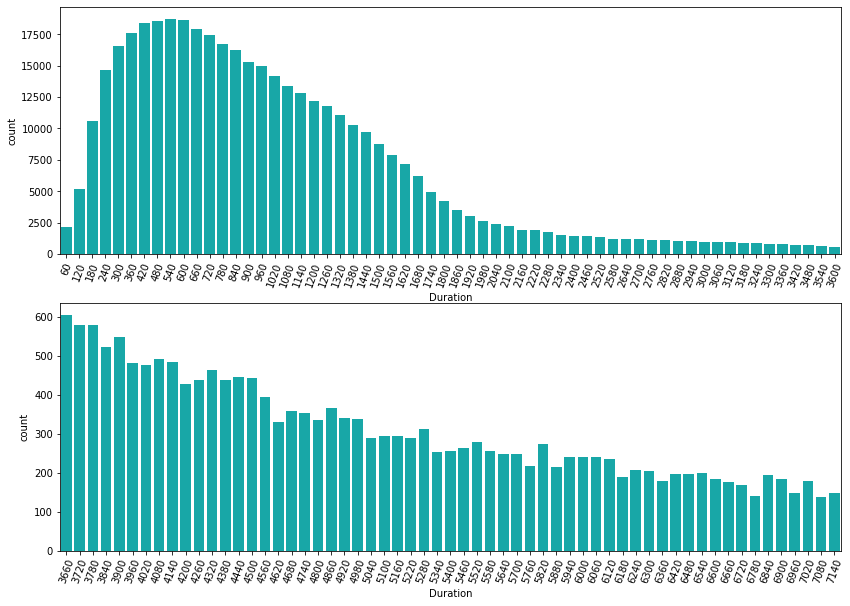

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,10))

sns.countplot(data = df_less_than_1h, x = 'Duration', ax = ax1, color = 'c')
sns.countplot(data = df_more_than_1h, x = 'Duration', ax = ax2, color = 'c')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()